<a href="https://colab.research.google.com/github/hardhik-25/ML_Projects/blob/main/Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [ ]:
df=pd.read_csv('/content/sample_data/ML+02+Time+Series+Dataset+1.csv')

In [ ]:
df.head()
df.columns=['Date','Sales']

In [ ]:
df.head(3)

,Date,Sales
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185


In [ ]:
dates=pd.date_range(start='2003-01-01',freq='MS',periods=len(df))
dates
df['Date']=dates

In [ ]:
df.shape

(144, 2)

In [ ]:
df=df.set_index('Date')

In [ ]:
df.head(5)

,Sales
Date,
2003-01-01,141
2003-02-01,157
2003-03-01,185
2003-04-01,199
2003-05-01,203


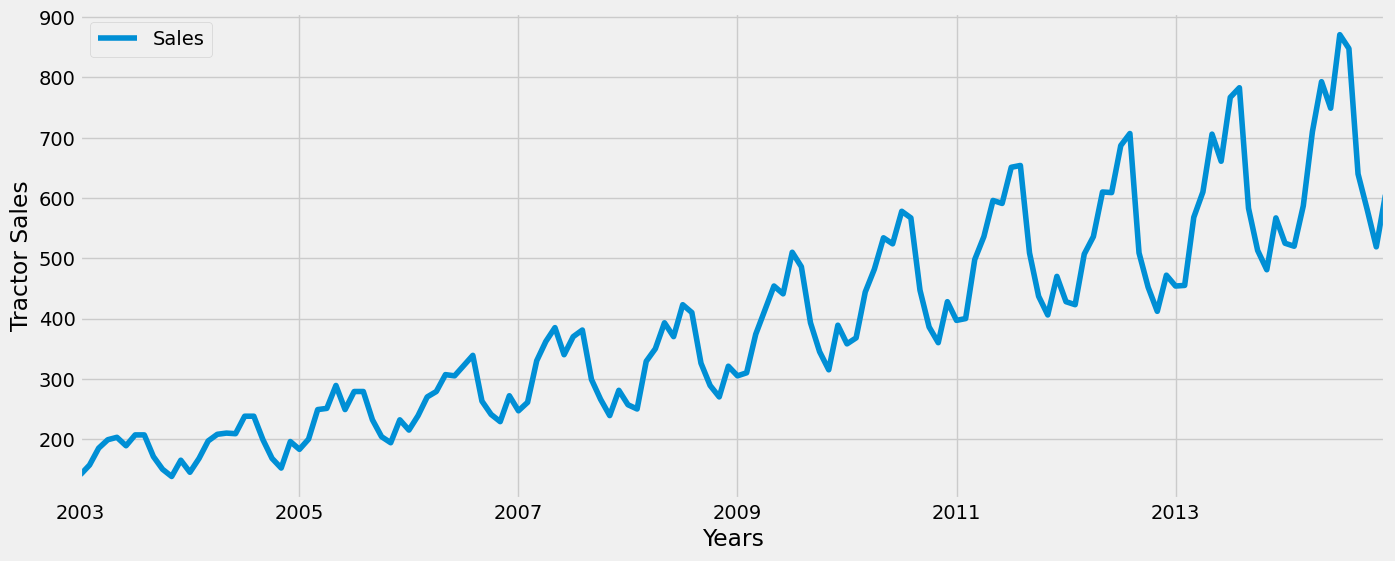

In [ ]:
df.plot(figsize=(15,6))
plt.xlabel('Years')
plt.ylabel('Tractor Sales')
plt.show()

<Axes: xlabel='Date', ylabel='Sales'>

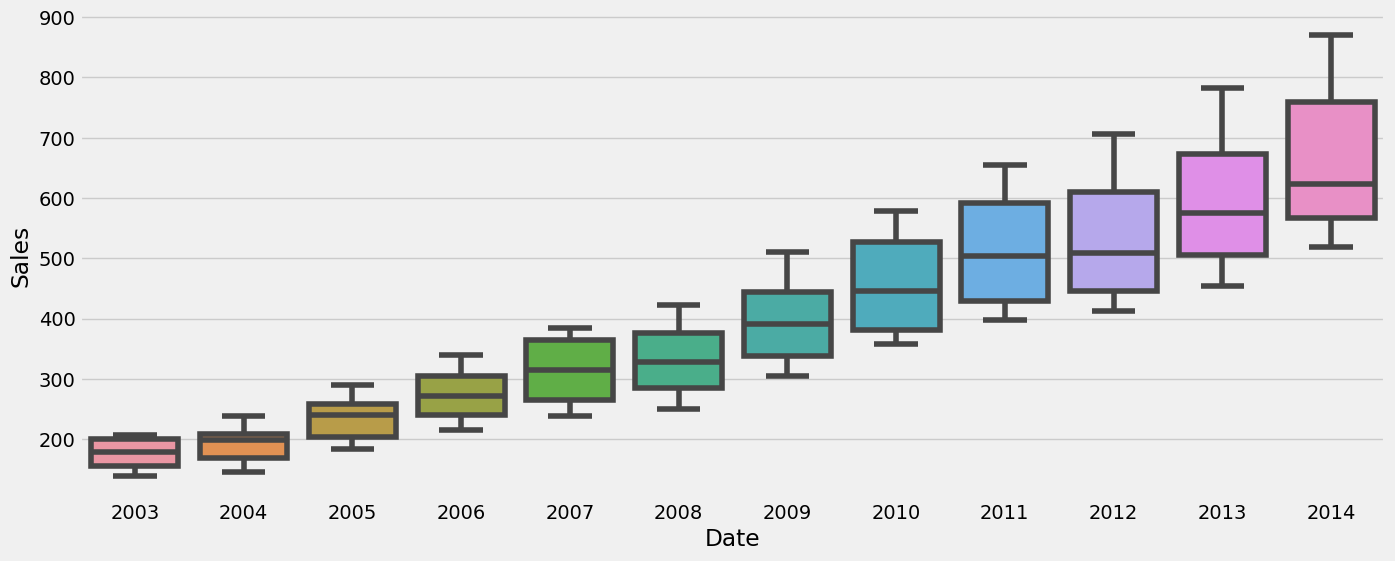

In [ ]:
fig, ax =plt.subplots(figsize=(15,6))
sns.boxplot(x=df['Sales'].index.year, y=df['Sales'], ax=ax)

<Axes: xlabel='Date', ylabel='Sales'>

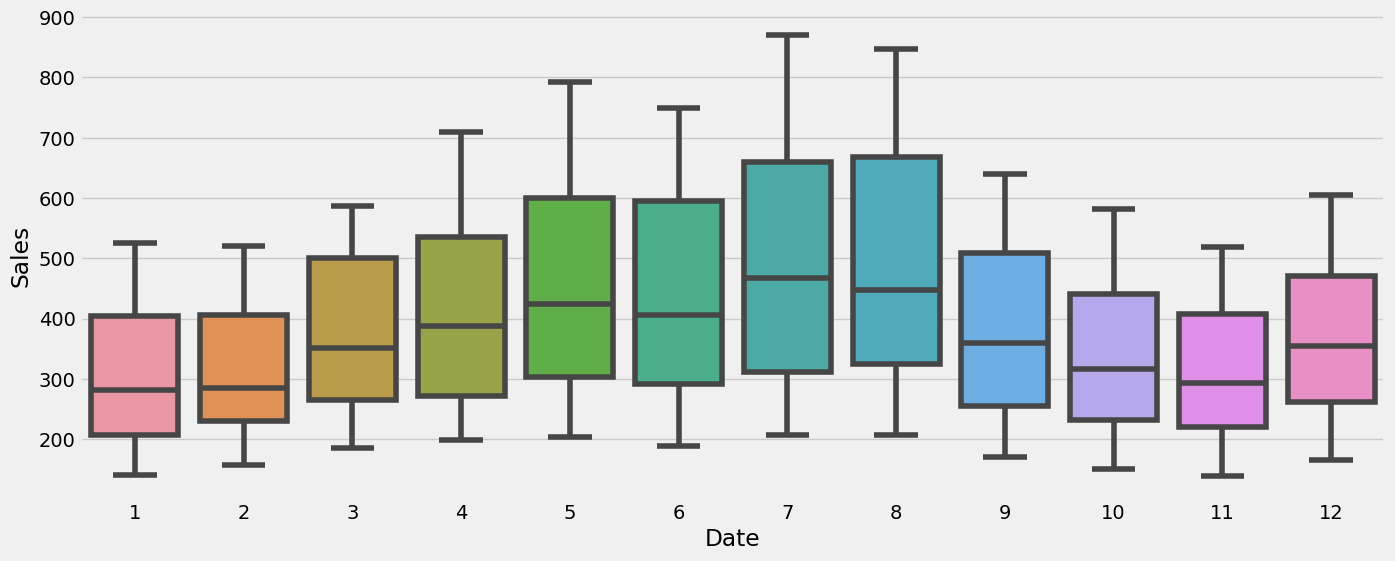

In [ ]:
fig, ax= plt.subplots(figsize=(15,6))
sns.boxplot(x=df['Sales'].index.month, y=df['Sales'], ax=ax)

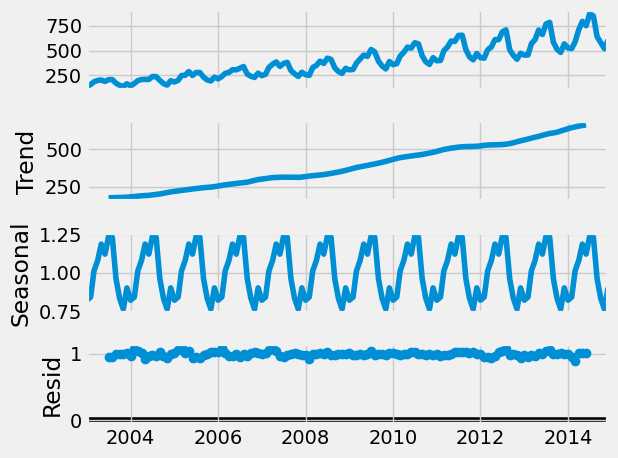

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df, model='multiplicative')
fig = decomposition.plot()
plt.show()

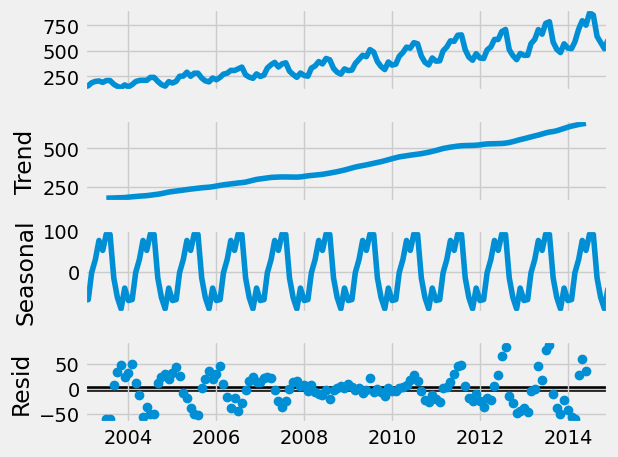

In [ ]:
decomposition1 = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition1.plot()
plt.show()

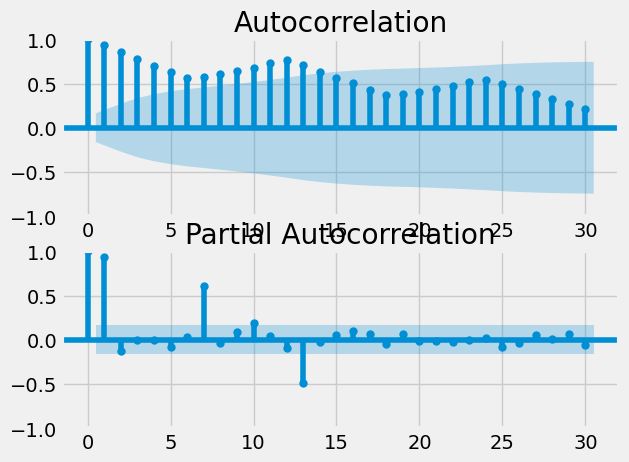

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
plt.figure()
plt.subplot(211)
plot_acf(df.Sales, ax=plt.gca(), lags= 30)
plt.subplot(212)
plot_pacf(df.Sales, ax=plt.gca(), lags=30)
plt.show()

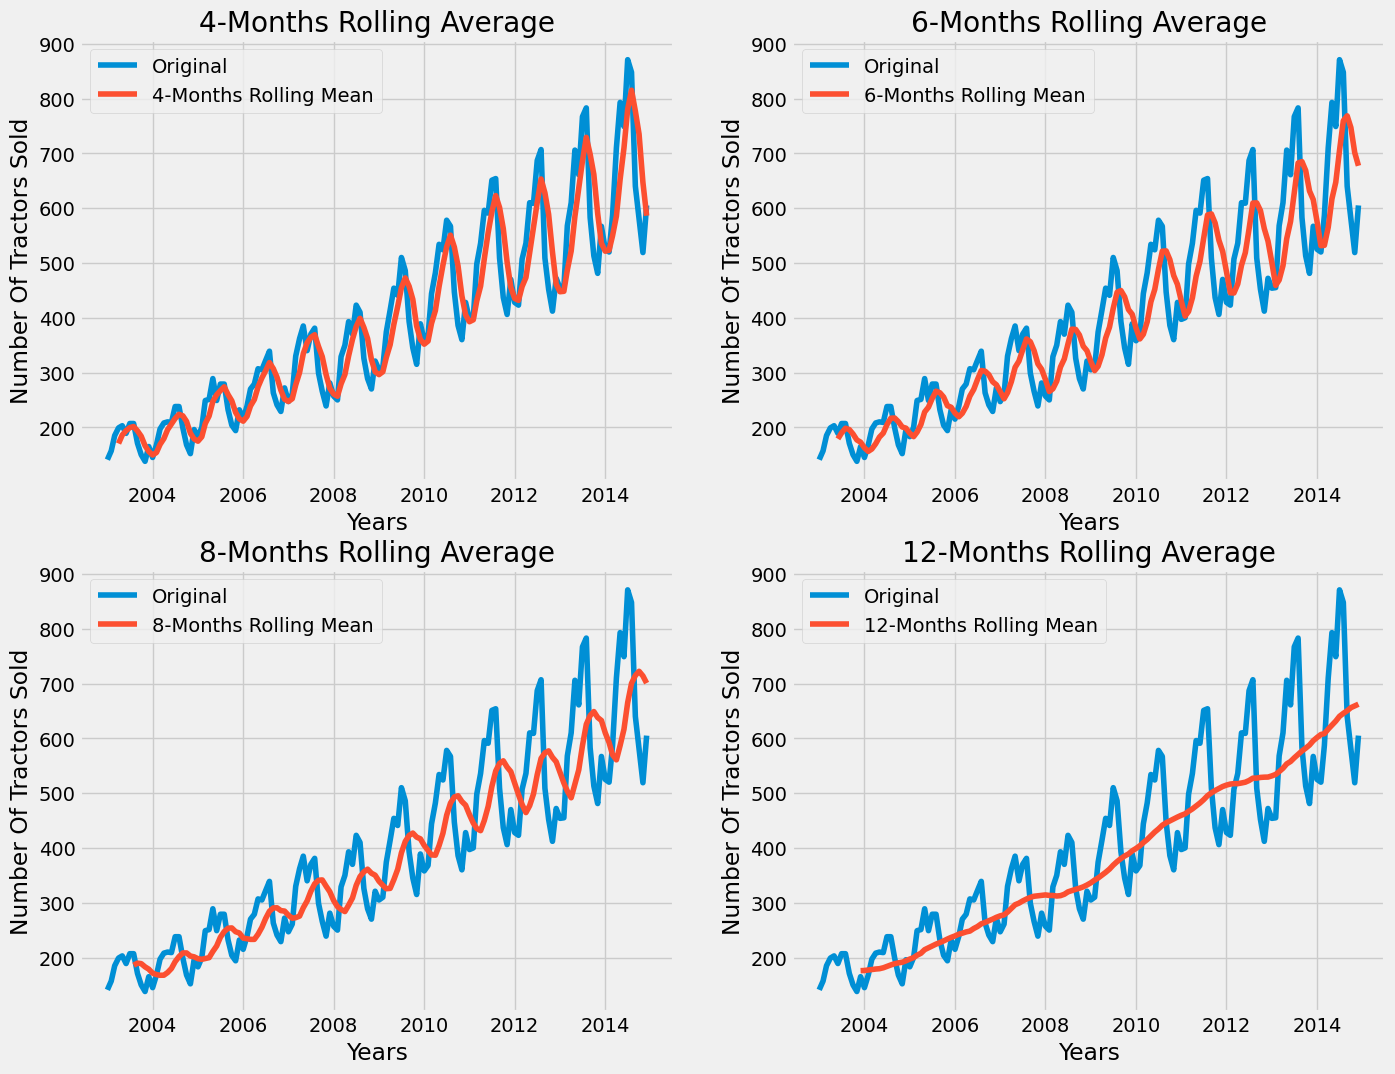

In [ ]:
fig, axes= plt.subplots(2, 2)
fig.set_figwidth(15)
fig.set_figheight(12)
axes[0][0].plot(df.index, df, label='Original')
axes[0][0].plot(df.index, df.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel('Years')
axes[0][0].set_ylabel('Number Of Tractors Sold')
axes[0][0].set_title('4-Months Rolling Average')
axes[0][0].legend(loc='best')
axes[0][1].plot(df.index, df, label='Original')
axes[0][1].plot(df.index, df.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel('Years')
axes[0][1].set_ylabel('Number Of Tractors Sold')
axes[0][1].set_title('6-Months Rolling Average')
axes[0][1].legend(loc='best')
axes[1][0].plot(df.index, df, label='Original')
axes[1][0].plot(df.index, df.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel('Years')
axes[1][0].set_ylabel('Number Of Tractors Sold')
axes[1][0].set_title('8-Months Rolling Average')
axes[1][0].legend(loc='best')
axes[1][1].plot(df.index, df, label='Original')
axes[1][1].plot(df.index, df.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel('Years')
axes[1][1].set_ylabel('Number Of Tractors Sold')
axes[1][1].set_title('12-Months Rolling Average')
axes[1][1].legend(loc='best')

In [ ]:
def test_stationaryity(timeseries):
  #determing rolling stats
  rolmean = timeseries.rolling(window=12).mean()
  rolstd = timeseries.rolling(window=12).std()
  #plot rolling stats
  orig = plt.plot(timeseries, color='blue',label='Original')
  mean = plt.plot(rolmean, color='red', label='Rolling Mean')
  std = plt.plot(rolstd,color='black',label='Rolling std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show()
  #Perform Dickey-Fuller Test:
  print('Results of Dickey_Fuller Test: ')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput= pd.Series(dftest[0:4],index=['Test Statistic', 'p-value','#Lags Used','Number of Observation'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]= value
  print(dfoutput)

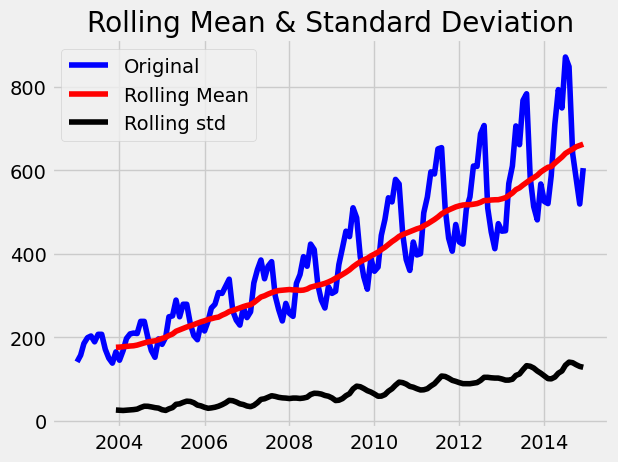

Results of Dickey_Fuller Test: 
Test Statistic             1.108825
p-value                    0.995291
#Lags Used                14.000000
Number of Observation    129.000000
Critical Value (1%)       -3.482088
Critical Value (5%)       -2.884219
Critical Value (10%)      -2.578864
dtype: float64


In [ ]:
test_stationaryity(df['Sales'])

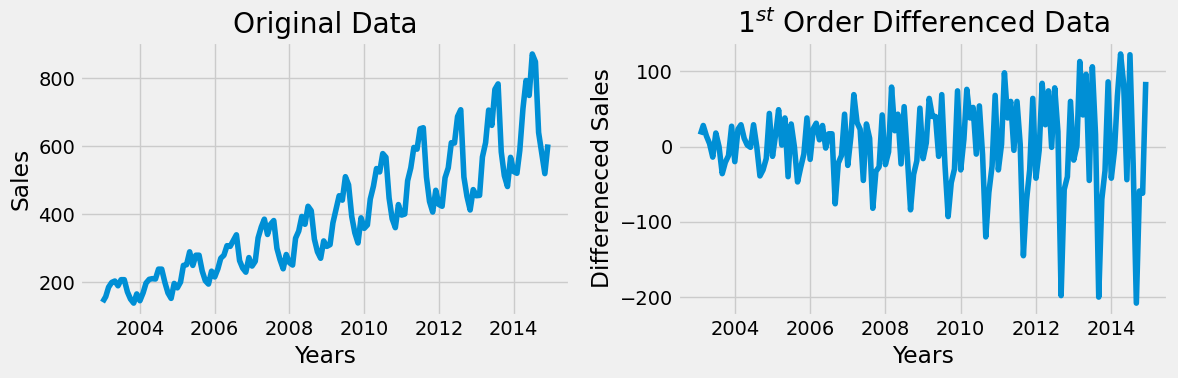

In [ ]:
fig, axes = plt.subplots(1,2)
fig.set_figwidth(12)
fig.set_figheight(4)
axes[0].plot(df.index, df['Sales'])
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Sales')
axes[0].set_title('Original Data')
#Differncing
axes[1].plot(df.index, df['Sales'].diff(periods=1))
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Differeneced Sales')
axes[1].set_title('1$^{st}$ Order Differenced Data')
plt.tight_layout()
plt.show()

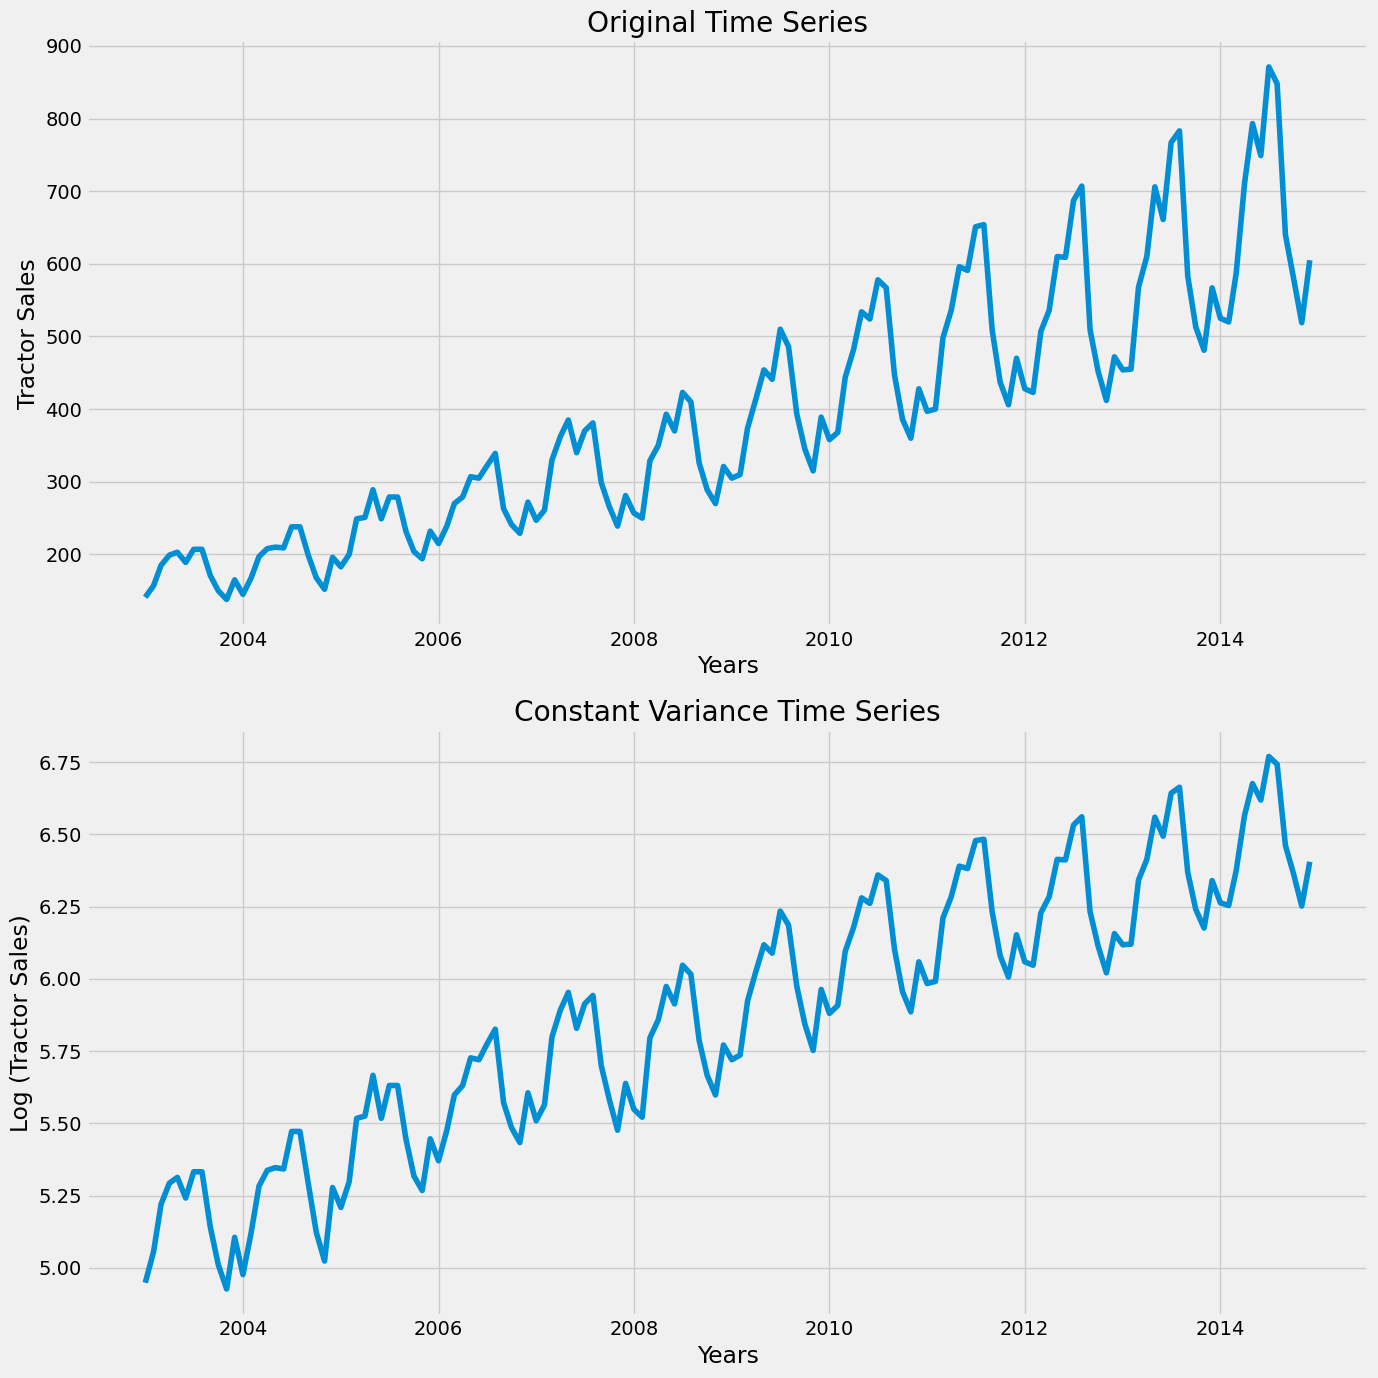

In [ ]:
fig, axes = plt.subplots(2,1)
fig.set_figwidth(14)
fig.set_figheight(14)
axes[0].plot(df)
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Tractor Sales')
axes[0].set_title('Original Time Series')
#Log Transform
df_log= np.log(df)
axes[1].plot(df_log)
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Log (Tractor Sales)')
axes[1].set_title('Constant Variance Time Series')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Diferenced log (Tractor Sales)')

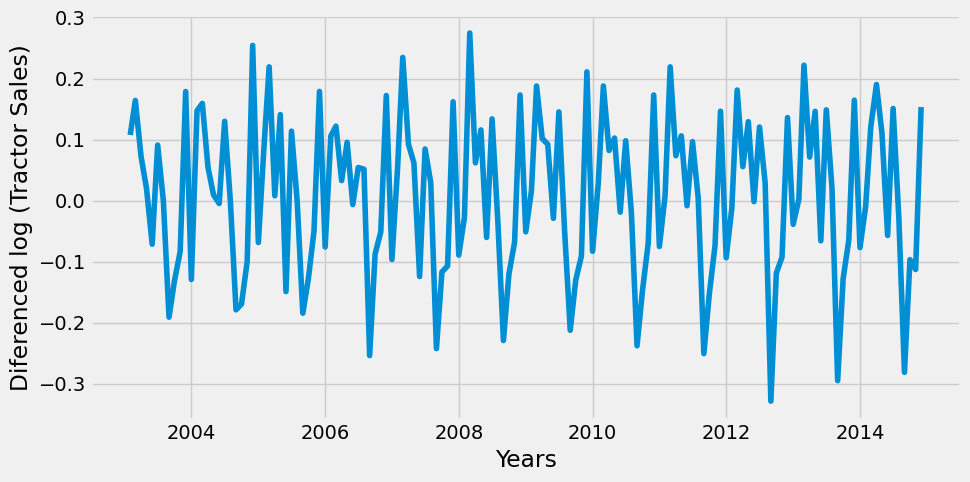

In [ ]:
plt.figure(figsize=(10,5))
df_log_diff = np.log(df).diff(periods=1)
plt.plot(df_log_diff)
plt.xlabel('Years')
plt.ylabel('Diferenced log (Tractor Sales)')

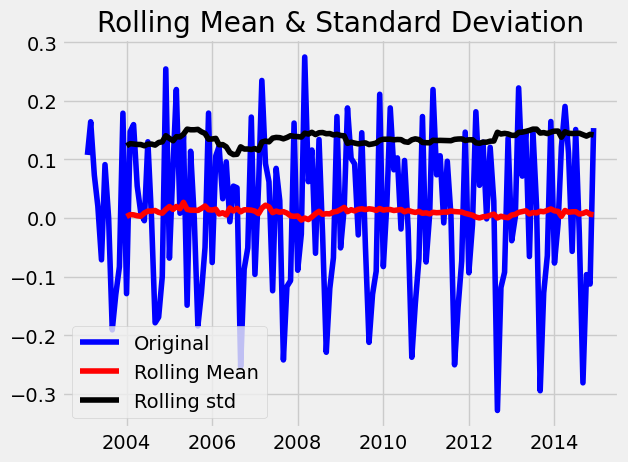

Results of Dickey_Fuller Test: 
Test Statistic            -2.680467
p-value                    0.077480
#Lags Used                14.000000
Number of Observation    128.000000
Critical Value (1%)       -3.482501
Critical Value (5%)       -2.884398
Critical Value (10%)      -2.578960
dtype: float64


In [ ]:
# jab hum stationary m convert krte usme kuch null values aa jati h isliye ab null remove krenge
df_log_diff.dropna(inplace=True)
test_stationaryity(df_log_diff)

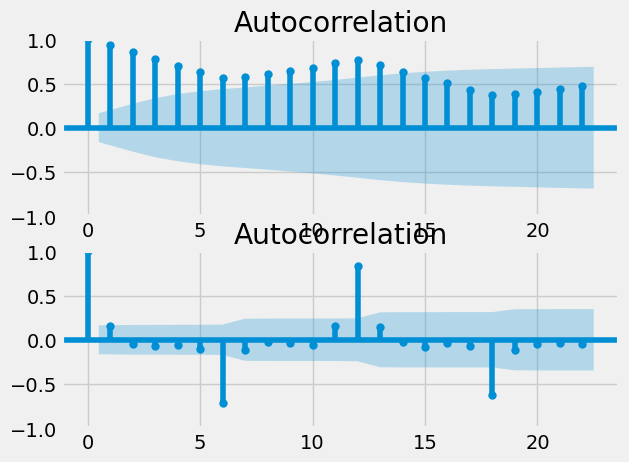

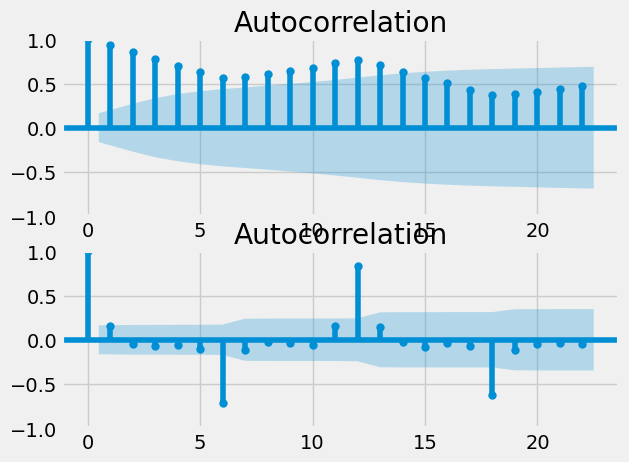

In [ ]:
fig, (ax1,ax2) = plt.subplots(2)
plot_acf(df.Sales, ax=ax1)
plot_acf(df.Sales.diff().dropna(), ax=ax2)

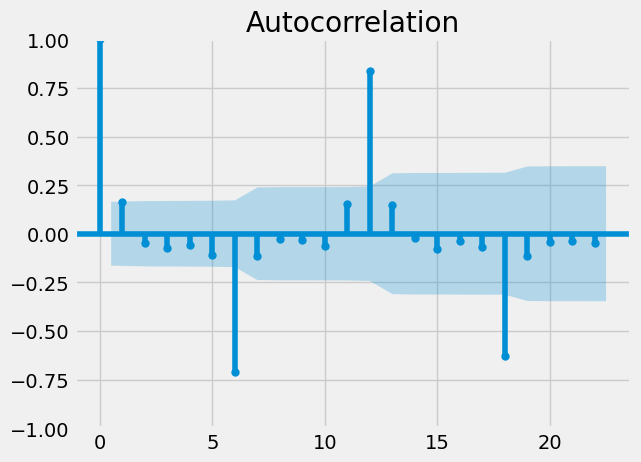

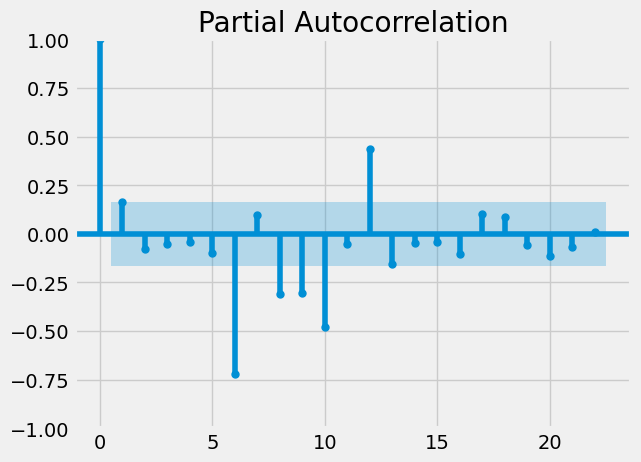

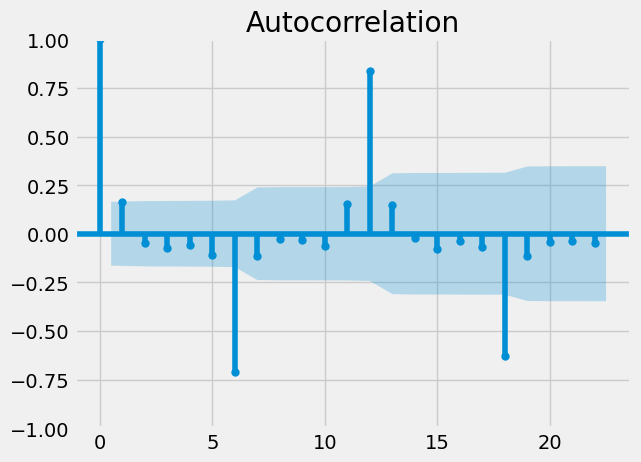

In [ ]:
plot_pacf(df.diff().dropna())
plot_acf(df.diff().dropna())
# p = 1or 2 and q = 1 or 2

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


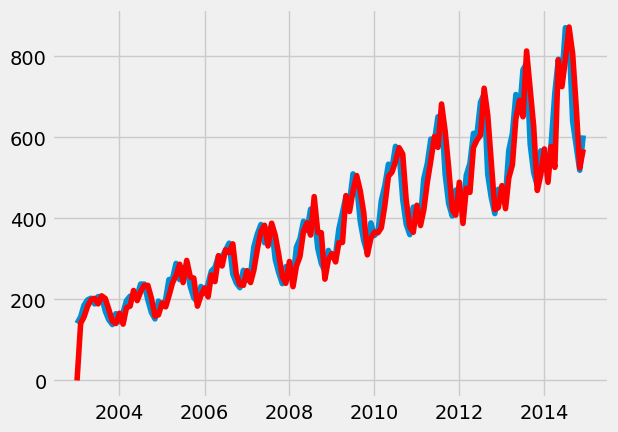

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = sm.tsa.arima.ARIMA(df, order=(2,1,2))
results_ARIMA = model.fit()
plt.plot(df)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.show()

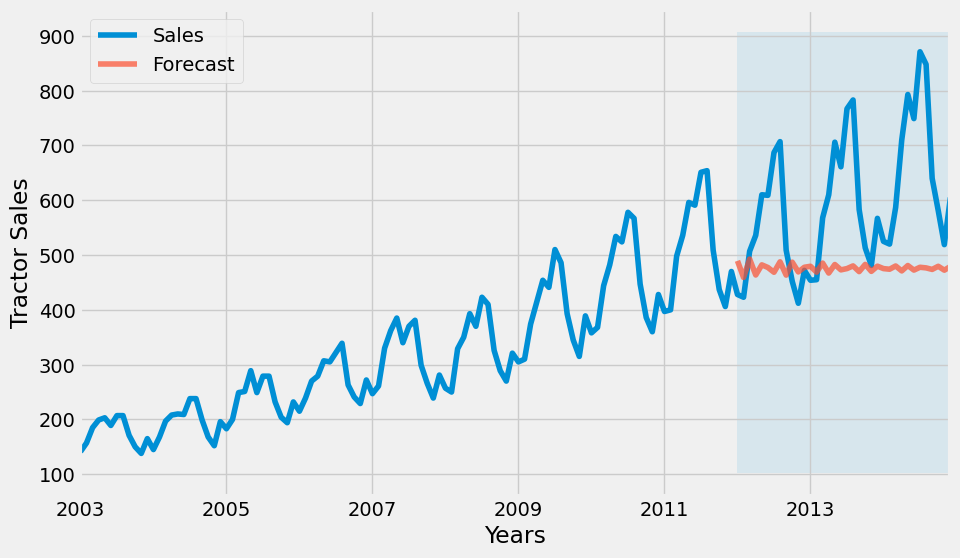

In [ ]:
pred_arima=results_ARIMA.predict(start=pd.to_datetime('2012-01-01'),end=pd.to_datetime('2014-12-01'),dynamic=True)
axis=df.plot(label='Original', figsize=(10,6))
pred_arima.plot(ax=axis, label='Forecast',alpha=0.7)
# axis.fill_betweenx(axis.get_ylim(), pd.to_datetime('2012-01-01'), df.index[-1],alpha=.1, zorder=-1)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()
plt.close()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


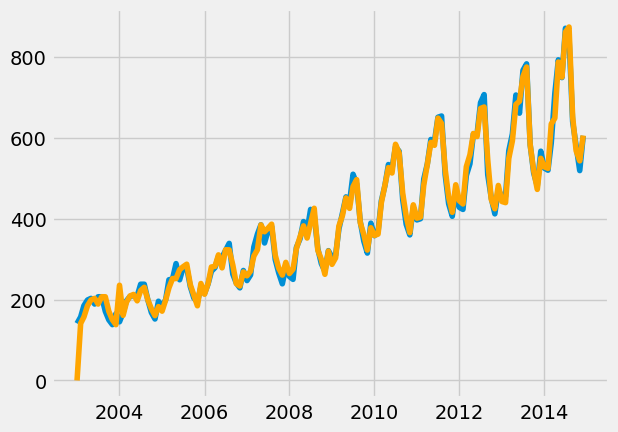

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = sm.tsa.statespace.SARIMAX(df,order=(1,1,2),seasonal_order=(1,1,2,12))
results_SARIMAX = model.fit()
plt.plot(df)
plt.plot(results_SARIMAX.fittedvalues, color='orange')
plt.show()

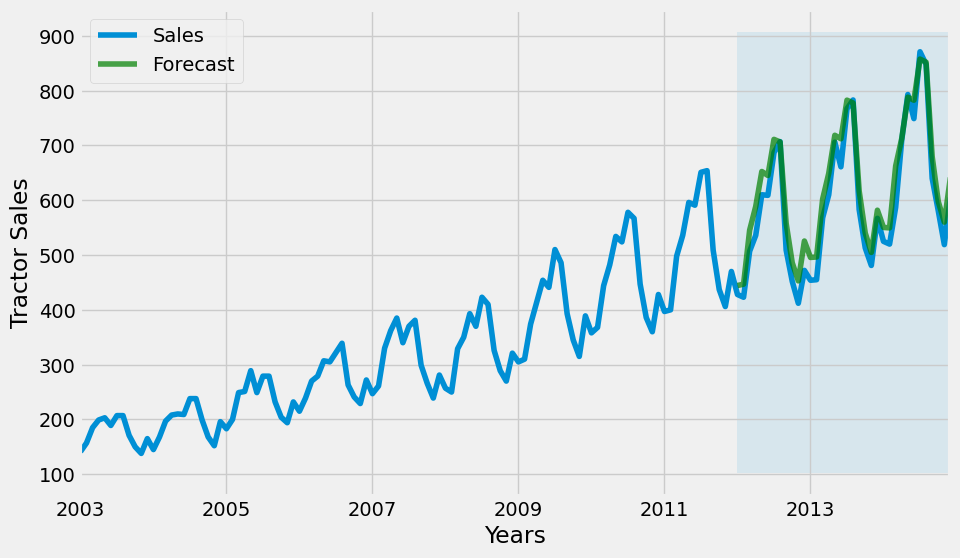

In [ ]:
pred_sarimax=results_SARIMAX.predict(start=pd.to_datetime('2012-01-01'),end=pd.to_datetime('2014-12-01'),dynamic=True)
axis=df.plot(label='Original', figsize=(10,6))
pred_sarimax.plot(ax=axis, label='Forecast',alpha=0.7,color='green')
axis.fill_betweenx(axis.get_ylim(), pd.to_datetime('2012-01-01'), df.index[-1],alpha=.1, zorder=-1)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima
model = auto_arima(df, start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                   start_P=0, seasonal=True,
                   d=1, D=1, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,inforamtion_criterion='aic',
                   stepwise=True)
print('best aic: ',model.aic())
print('best order: ',model.order)
print('best seasonal order : ',model.seasonal_order)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1126.461, Time=1.02 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1133.413, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1124.270, Time=0.34 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1124.489, Time=0.48 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1123.180, Time=0.14 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1124.536, Time=0.67 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1123.631, Time=1.32 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1125.170, Time=0.31 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1125.153, Time=0.44 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1123.225, Time=0.23 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1119.806, Time=0.99 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1120.909, Time=3.39 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1121.150, Time=2.66 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=inf, Time=2.82 sec
 ARIMA(3,1,1)(0,1,0)[12]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


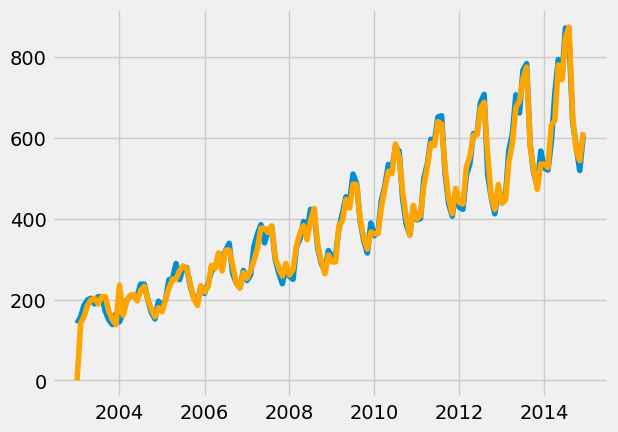

In [ ]:
# best aic value dalenge fhirse
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = sm.tsa.statespace.SARIMAX(df,order=(2,1,1),seasonal_order=(0,1,0,12))
results_SARIMAX = model.fit()
plt.plot(df)
plt.plot(results_SARIMAX.fittedvalues, color='orange')
plt.show()

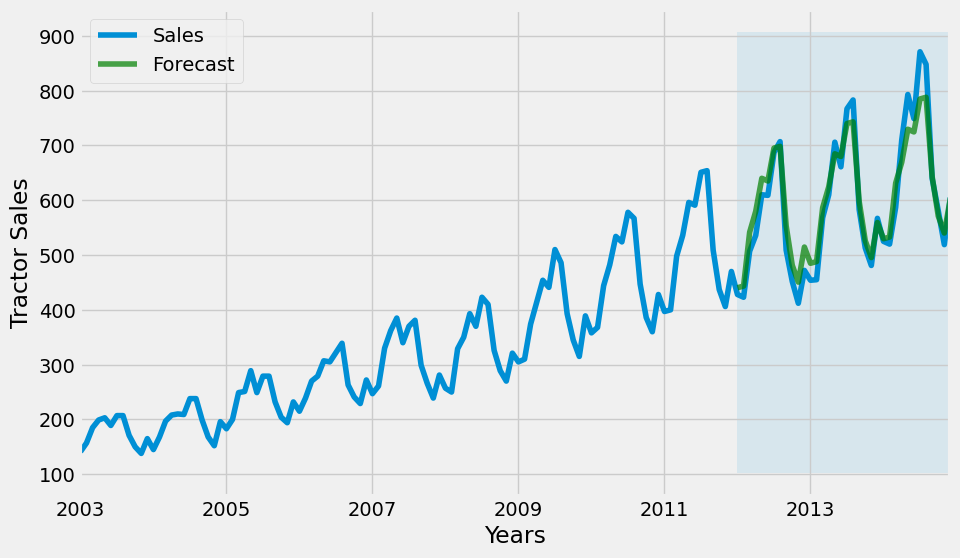

In [ ]:
pred_sarimax=results_SARIMAX.predict(start=pd.to_datetime('2012-01-01'),end=pd.to_datetime('2014-12-01'),dynamic=True)
axis=df.plot(label='Original', figsize=(10,6))
pred_sarimax.plot(ax=axis, label='Forecast',alpha=0.7,color='green')
axis.fill_betweenx(axis.get_ylim(), pd.to_datetime('2012-01-01'), df.index[-1],alpha=.1, zorder=-1)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [ ]:
forecast=results_SARIMAX.forecast(steps=36)
forecast

2015-01-01     565.087778
2015-02-01     561.337204
2015-03-01     629.495568
2015-04-01     753.434540
2015-05-01     837.224305
2015-06-01     793.881626
2015-07-01     916.430339
2015-08-01     893.888004
2015-09-01     686.269819
2015-10-01     627.588335
2015-11-01     565.854050
2015-12-01     652.075715
2016-01-01     612.348412
2016-02-01     608.752102
2016-03-01     677.039157
2016-04-01     801.085486
2016-05-01     884.964812
2016-06-01     841.696846
2016-07-01     964.307886
2016-08-01     941.817547
2016-09-01     734.242738
2016-10-01     675.597439
2016-11-01     613.893340
2016-12-01     700.140188
2017-01-01     660.433893
2017-02-01     656.855108
2017-03-01     725.156783
2017-04-01     849.215309
2017-05-01     933.104809
2017-06-01     889.845331
2017-07-01    1012.463452
2017-08-01     989.979019
2017-09-01     782.409139
2017-10-01     723.767950
2017-11-01     662.067281
2017-12-01     748.316990
Freq: MS, Name: predicted_mean, dtype: float64

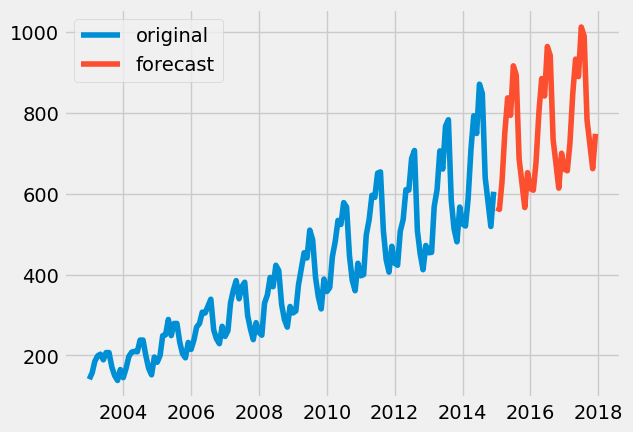

In [ ]:
idx=pd.date_range(df.index[-1], periods=36, freq='MS')
plt.plot(df,label='original')
plt.plot(forecast,label='forecast')
plt.legend()

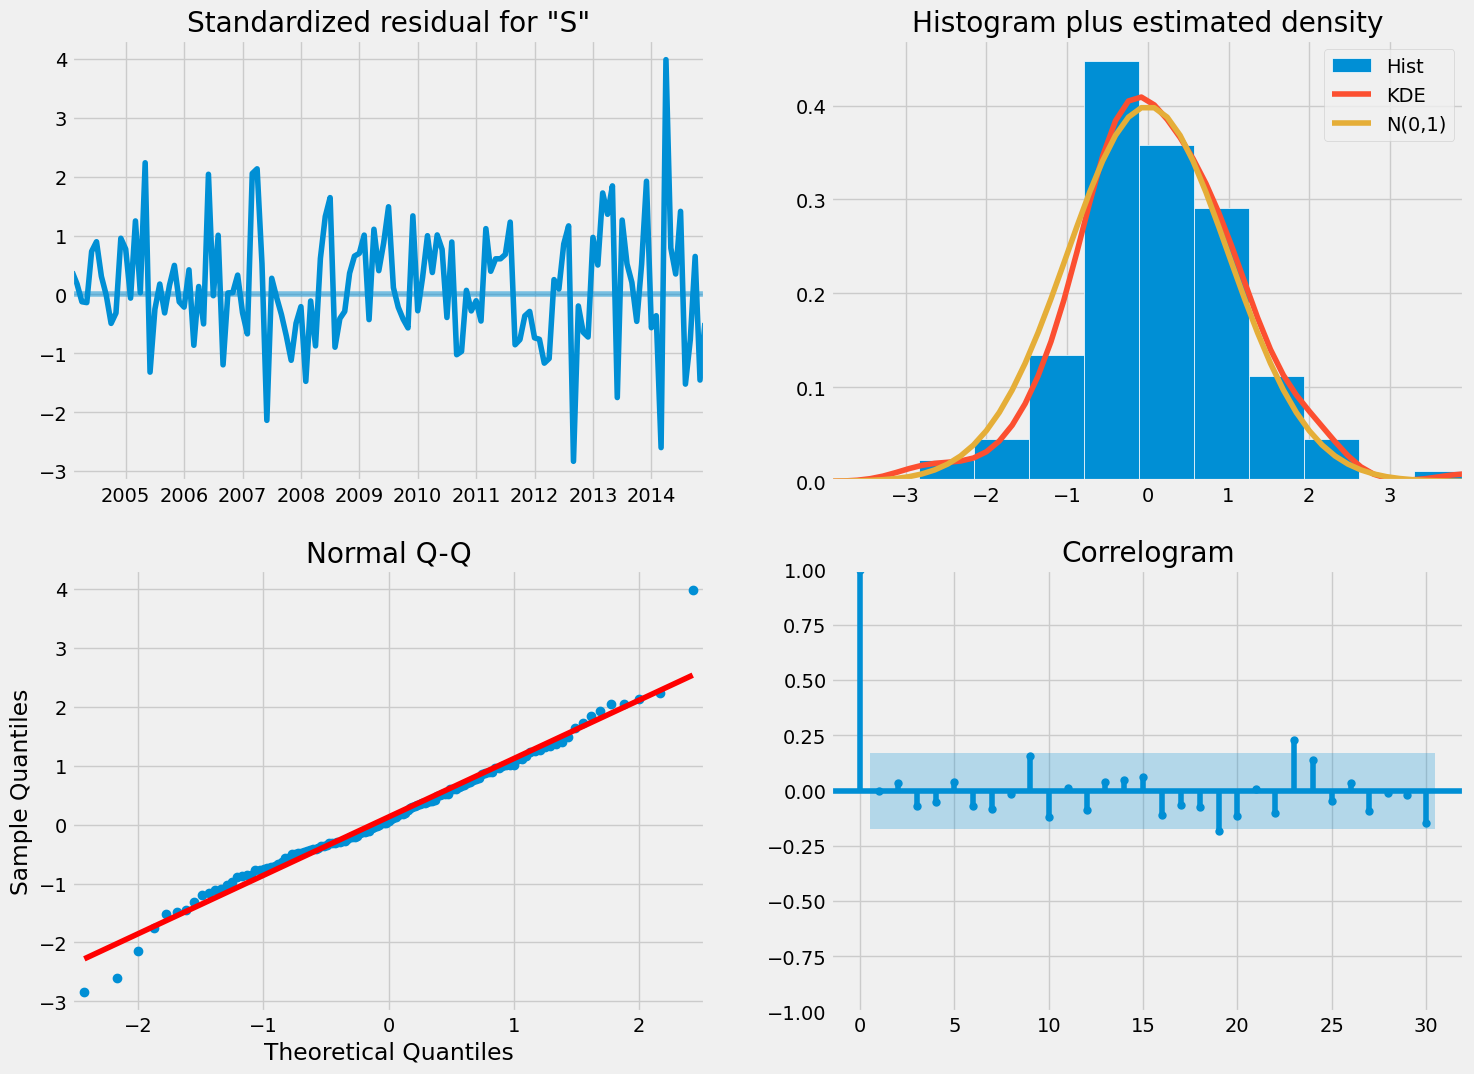

In [ ]:
results_SARIMAX.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

DATA-BASED MODEL

Single-Exponential

In [ ]:
train=df[:'2012']
test=df['2013':]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


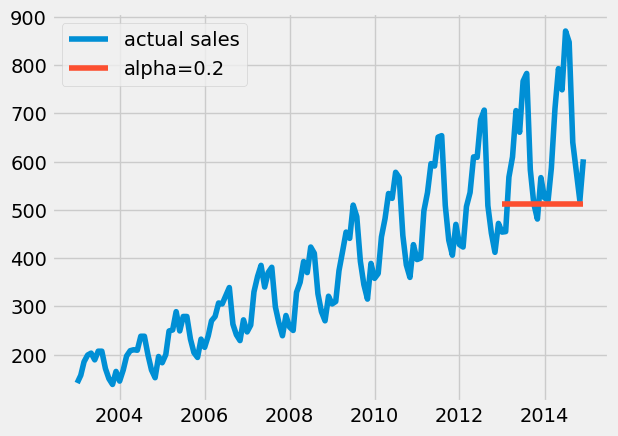

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
model=SimpleExpSmoothing(train)
fit1=model.fit(smoothing_level=0.2)
forecast1=fit1.forecast(steps=24)
plt.plot(df,label='actual sales')
plt.plot(forecast1,label='alpha=0.2')
plt.legend()

**DOUBLE EXPONENTIAL(Holt)**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


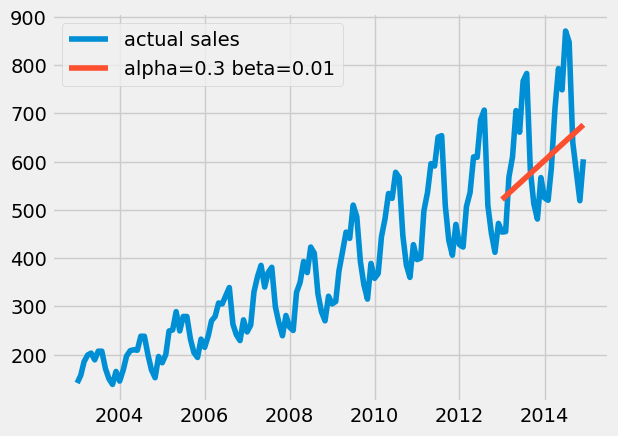

In [ ]:
model=Holt(train)
fit3=model.fit(smoothing_level=0.3,smoothing_slope=0.01)
forecast3=fit3.forecast(steps=24)


plt.plot(df,label='actual sales')
plt.plot(forecast3,label='alpha=0.3 beta=0.01')
plt.legend()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Text(0.5, 1.0, "Holt_Winter's Seasonal Smoothing")

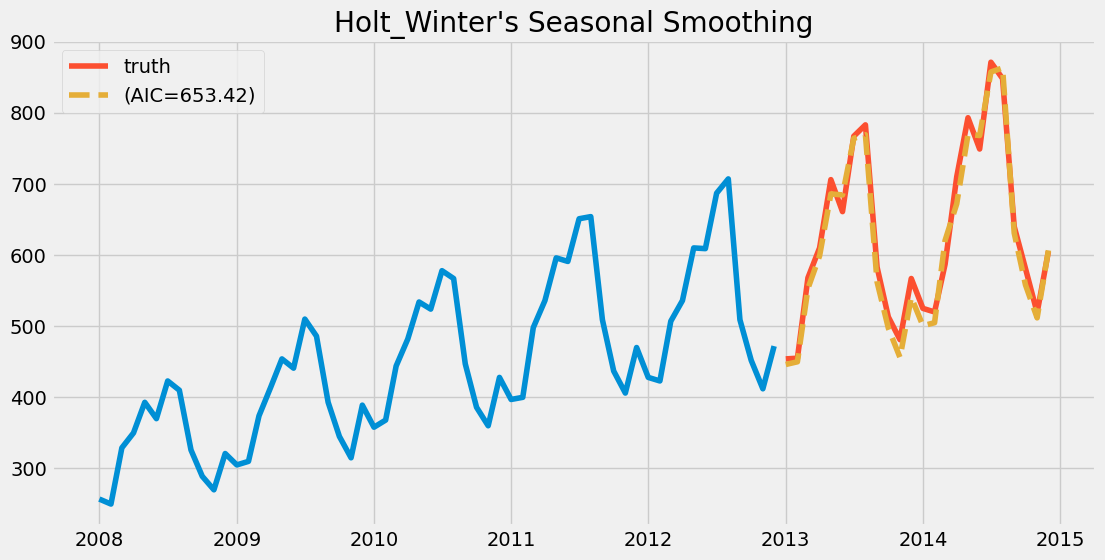

In [ ]:
#HOLTS-WINTER
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12)
fit= model.fit()
pred= fit.forecast(24)

fig, ax= plt.subplots(figsize=(12,6))
ax.plot(train.index[60:],train.values[60:]);
ax.plot(test.index, test.values, label='truth');
ax.plot(test.index, pred, linestyle='--',label='(AIC={:0.2f})'.format(fit.aic));

ax.legend()
ax.set_title("Holt_Winter's Seasonal Smoothing")